In [812]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('max_columns', 500)

In [813]:
def group_churn_rate(col1, col2, title):
    df.groupby(col1)[col2].value_counts(normalize=True).rename('percent').reset_index().pipe((sns.catplot,'data'),x=col1,y='percent',hue = col2, kind='bar', height = 3, aspect=2)
    plt.title(title)
    print(df.groupby(col1)[col2].value_counts(normalize=True).unstack())
    

In [814]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [815]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [816]:
df.shape

(7043, 21)

In [817]:
#no duplicate values in customer ID, so I'll delete the column
len(df['customerID'].unique())

7043

In [818]:
df.drop(['customerID'],axis=1,inplace=True)

In [819]:
#CLEAN - no missing values
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [820]:
df['Churn'] = df['Churn'].replace('Yes',1).replace('No',0)

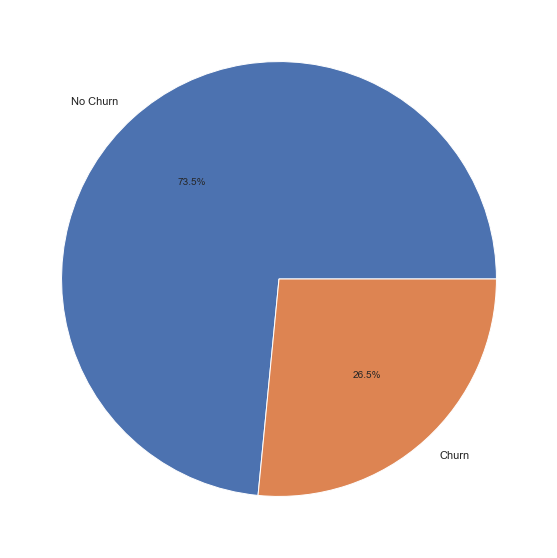

In [821]:
fig, ax = plt.subplots(figsize = (10,10))
labels = 'No Churn', 'Churn'
x = df.groupby('Churn').size().values
ax.pie(x, autopct='%1.1f%%', labels=labels)
plt.show()

fig.savefig('piechart2.png')

In [822]:
#CLEAN - nice split on gender, no strange values
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Churn          0         1
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603


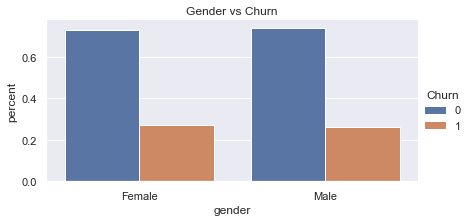

In [823]:
#No significant difference between gender status
group_churn_rate("gender","Churn",'Gender vs Churn')

**Hypothesis Test**

- H0: u(male) == u(female)
- Ha: !Ho

In [824]:
male = df[df['gender']=='Male']['Churn']
female = df[df['gender']=='Female']['Churn']

t_stat, p_val = stats.ttest_ind(male, female)

t_stat, p_val

(-0.722673440663404, 0.46990453909804797)

**Based on hypothesis test, it is clear that gender does not have much of an effect**

In [825]:
#CLEAN - slightly biased towards younger
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Churn                 0         1
SeniorCitizen                    
0              0.763938  0.236062
1              0.583187  0.416813


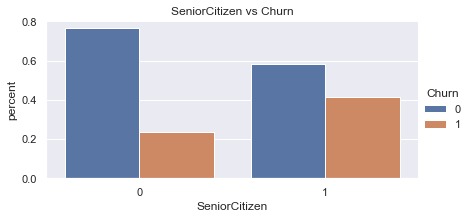

In [826]:
#Older individuals tend to churn more
group_churn_rate("SeniorCitizen","Churn", 'SeniorCitizen vs Churn')

In [827]:
#CLEAN - no strange values
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

Churn           0         1
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649


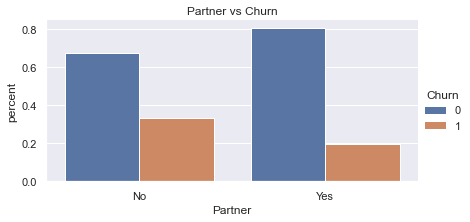

In [828]:
#Single people tend to churn more
group_churn_rate("Partner","Churn",'Partner vs Churn')

In [829]:
#CLEAN - slight skew towards no
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

Churn              0         1
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502


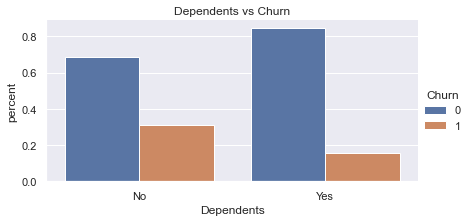

In [830]:
#people with no dependents seem to churn more
group_churn_rate("Dependents","Churn", 'Dependents vs Churn')

In [831]:
#almost everyone has phone service. Would be interesting if those without phone service are more likely to churn
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

Churn                0         1
PhoneService                    
No            0.750733  0.249267
Yes           0.732904  0.267096


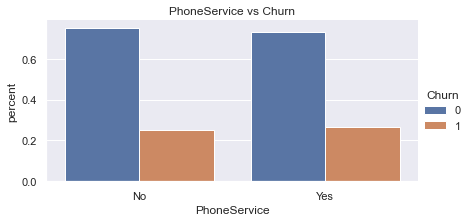

In [832]:
#No significant difference between PhoneService status
group_churn_rate("PhoneService","Churn", 'PhoneService vs Churn')

In [833]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Churn                    0         1
MultipleLines                       
No                0.749558  0.250442
No phone service  0.750733  0.249267
Yes               0.713901  0.286099


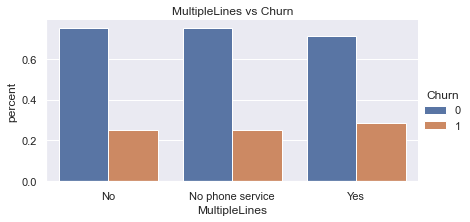

In [834]:
#Slight increase in churn if using multiple lines
group_churn_rate("MultipleLines","Churn", 'MultipleLines vs Churn')

In [835]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Churn                   0         1
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050


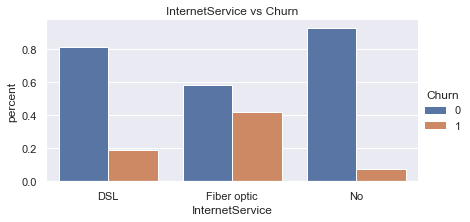

In [836]:
#Fiber Optic significantly increases churn rate
group_churn_rate('InternetService','Churn','InternetService vs Churn')

In [837]:
conditions = [
    (df['InternetService']=='Fiber optic') | (df['InternetService']=='DSL')
]

choices = [
    (1)
]

df['has_internet'] = np.select(conditions,choices,0)

In [838]:
conditions = [
    (df['InternetService']=='Fiber optic')
]

choices = [
    (1)
]

df['fiber_optic'] = np.select(conditions,choices,0)

In [839]:
df['InternetService'] = df['InternetService'].replace('No','No').replace('DSL','Yes').replace('Fiber optic','Yes')

In [840]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

Churn                       0         1
OnlineSecurity                         
No                   0.582333  0.417667
No internet service  0.925950  0.074050
Yes                  0.853888  0.146112


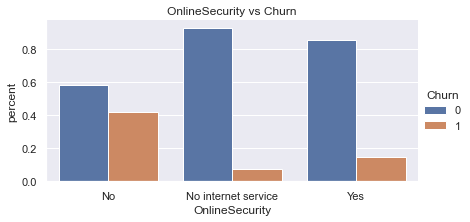

In [841]:
#No online security correlated with increase risk of Churn
group_churn_rate('OnlineSecurity','Churn','OnlineSecurity vs Churn')

In [842]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

Churn                       0         1
OnlineBackup                           
No                   0.600712  0.399288
No internet service  0.925950  0.074050
Yes                  0.784685  0.215315


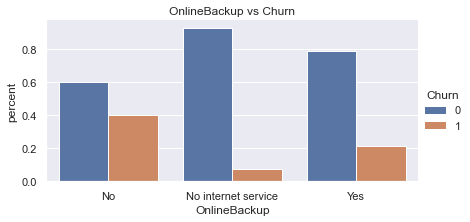

In [843]:
#No online backup is correlated with increase customer churn
group_churn_rate('OnlineBackup','Churn','OnlineBackup vs Churn')

In [844]:
#CLEAN - note: very similar to InternetService, OnlineSecurity, OnlineBackup
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

Churn                       0         1
DeviceProtection                       
No                   0.608724  0.391276
No internet service  0.925950  0.074050
Yes                  0.774979  0.225021


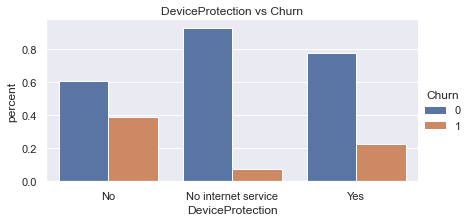

In [845]:
group_churn_rate('DeviceProtection','Churn','DeviceProtection vs Churn')

In [846]:
#Seems that people signed up for more things will churn less.
#Want to check later ratio of people that are only set up with 1, 2, 3, etc services

In [847]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

Churn                       0         1
TechSupport                            
No                   0.583645  0.416355
No internet service  0.925950  0.074050
Yes                  0.848337  0.151663


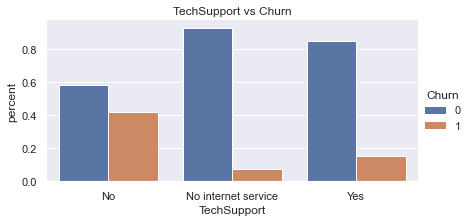

In [848]:
group_churn_rate('TechSupport','Churn','TechSupport vs Churn')

In [849]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

Churn                       0         1
StreamingTV                            
No                   0.664769  0.335231
No internet service  0.925950  0.074050
Yes                  0.699298  0.300702


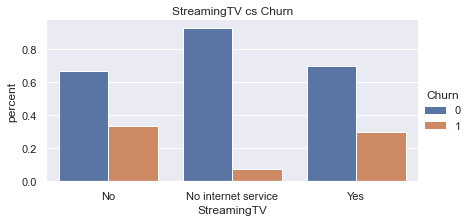

In [850]:
#Divide on StreamingTV is interesting. Roughly equal chance of churn if not using vs if using
group_churn_rate('StreamingTV','Churn','StreamingTV cs Churn')

In [851]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

Churn                       0         1
StreamingMovies                        
No                   0.663196  0.336804
No internet service  0.925950  0.074050
Yes                  0.700586  0.299414


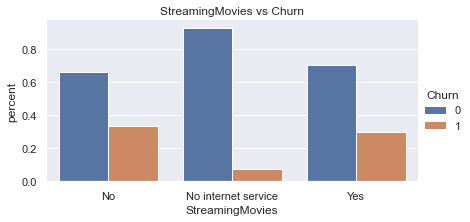

In [852]:
#Similar occurance as with StreamingTV.
group_churn_rate('StreamingMovies','Churn', 'StreamingMovies vs Churn')

In [853]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Churn                  0         1
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


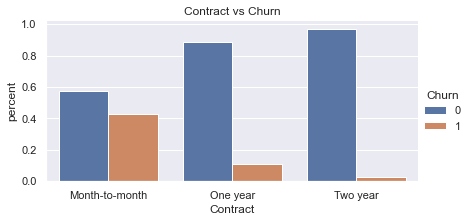

In [854]:
#People on shorter contract terms stay with company drastically shorter
group_churn_rate('Contract','Churn','Contract vs Churn')

In [855]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

Churn                    0         1
PaperlessBilling                    
No                0.836699  0.163301
Yes               0.664349  0.335651


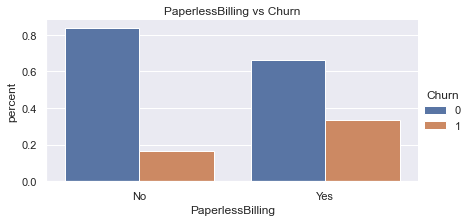

In [856]:
#Paperless billing increases risk of Churn... Paperbilling is older, harder to quit from?
group_churn_rate('PaperlessBilling','Churn', 'PaperlessBilling vs Churn')

In [857]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Churn                             0         1
PaymentMethod                                
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067


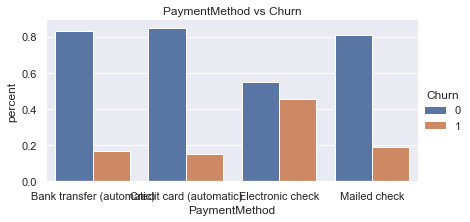

In [858]:
#Electronic checks by far the highest in terms of churn rate
group_churn_rate('PaymentMethod','Churn', 'PaymentMethod vs Churn')

In [859]:
churn = df[df['Churn']==1]
no_churn = df[df['Churn']==0]

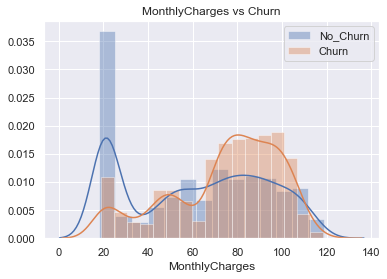

In [860]:
fig, ax = plt.subplots(1,1)
sns.distplot(no_churn['MonthlyCharges'],ax=ax, label='No_Churn')
sns.distplot(churn['MonthlyCharges'],ax=ax, label='Churn')
ax.set_title('MonthlyCharges vs Churn')
plt.legend()
plt.show()

In [861]:
#More churn occurs with people paying over $40 per month
#Want to investigate people with high monthly charge but not churn

In [862]:
a = df[(df['Churn']==0) & (df['MonthlyCharges'] > 60) & (df['MonthlyCharges'] < 100)]
b = df[(df['Churn']==1) & (df['MonthlyCharges'] > 60) & (df['MonthlyCharges'] < 100)]

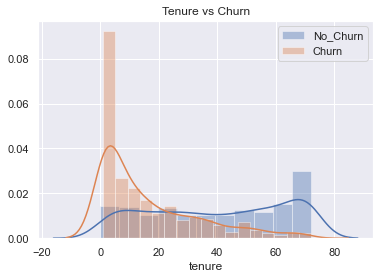

In [863]:
fig, ax = plt.subplots(1,1)
sns.distplot(a['tenure'],ax=ax, label='No_Churn')
sns.distplot(b['tenure'],ax=ax, label='Churn')
ax.set_title('Tenure vs Churn')
plt.legend()
plt.show()

**Hypothesis**
- Ho: u1 = u2
- Ha: u! != u2

In [864]:
from scipy import stats

In [865]:
t_stat, p_val = stats.ttest_ind(churn['MonthlyCharges'], no_churn['MonthlyCharges'])

In [866]:
t_stat, p_val

(16.53673801593631, 2.706645606888261e-60)

In [867]:
#I want to impute the total charges by using the mean of each respective monthly charge
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,has_internet,fiber_optic
488,Female,0,Yes,Yes,0,No,No phone service,Yes,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,1,0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0,0,0
936,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0,1,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0,0,0
1340,Female,0,Yes,Yes,0,No,No phone service,Yes,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0,1,0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,0,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,0,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0,0,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,0,0
6670,Female,0,Yes,Yes,0,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0,1,0


In [868]:
df1 = df.copy()

In [869]:
a = df1[df1['TotalCharges']==' ']
b = df1.drop(a.index)

In [870]:
b['TotalCharges'] = b['TotalCharges'].astype('float')

In [871]:
month_to_total = dict(b.groupby(['MonthlyCharges'])['TotalCharges'].mean())

In [872]:
conditions = [
    (df['TotalCharges']==' ')
]

choices = [
    (df['MonthlyCharges'].map(month_to_total))
]

df['TotalCharges'] = np.select(conditions, choices, df['TotalCharges'])

In [873]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [874]:
df.dropna(inplace=True)

In [875]:
churn = df[df['Churn']==1]
no_churn = df[df['Churn']==0]

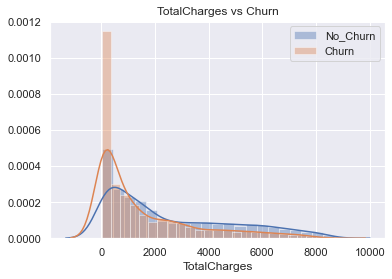

In [876]:
fig, ax = plt.subplots(1,1)
sns.distplot(no_churn['TotalCharges'],ax=ax, label='No_Churn')
sns.distplot(churn['TotalCharges'],ax=ax, label='Churn')
ax.set_title('TotalCharges vs Churn')
plt.legend()
plt.show()

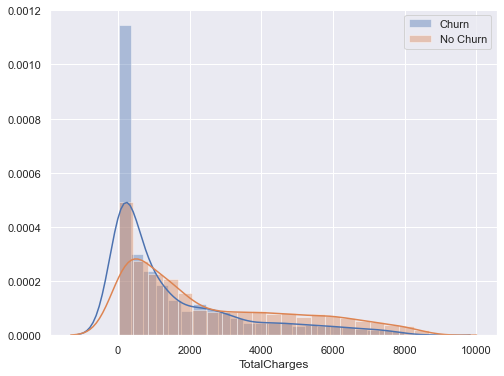

In [877]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(churn['TotalCharges'],label='Churn') # Blue distribution
sns.distplot(no_churn['TotalCharges'],label='No Churn') # Green distribution
plt.legend()

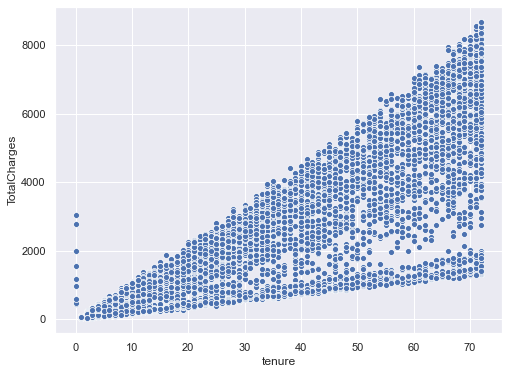

In [878]:
#Total Charges is directly related to tenure....
#This means I can calculate total number of payments and identify if there were previous breaks in service for customer
sns.scatterplot('tenure','TotalCharges',data=df)

In [879]:
#Creating new column, number of total payments
#Assumes that a person hasn't updated monthly charge
df['est_num_payments'] = df['TotalCharges'] // df['MonthlyCharges']

In [880]:
df[df['tenure']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,has_internet,fiber_optic,est_num_payments
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,429.244737,0,0,0,21.0
936,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,2004.116667,0,1,0,24.0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,1173.550000,0,0,0,45.0
1340,Female,0,Yes,Yes,0,No,No phone service,Yes,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,1537.925000,0,1,0,27.0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,598.397727,0,0,0,30.0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,975.490000,0,0,0,38.0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,479.729762,0,0,0,23.0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,582.320238,0,0,0,29.0
6670,Female,0,Yes,Yes,0,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,3043.025000,0,1,0,41.0
6754,Male,0,No,Yes,0,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,2785.575000,0,1,0,45.0


In [881]:
conditions = [
    (df['tenure']==0)
]

choices = [
    (df['est_num_payments'])
]

df['tenure'] = np.select(conditions,choices,df['tenure'])

In [882]:
df.drop(['est_num_payments'],axis=1,inplace=True)

In [883]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,has_internet,fiber_optic
0,Female,0,Yes,No,1.0,No,No phone service,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1,0
1,Male,0,No,No,34.0,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,1,0
2,Male,0,No,No,2.0,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1,0
3,Male,0,No,No,45.0,No,No phone service,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,1,0
4,Female,0,No,No,2.0,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1,1


In [884]:
df_base = df.copy()

In [885]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7042 non-null   object 
 1   SeniorCitizen     7042 non-null   int64  
 2   Partner           7042 non-null   object 
 3   Dependents        7042 non-null   object 
 4   tenure            7042 non-null   float64
 5   PhoneService      7042 non-null   object 
 6   MultipleLines     7042 non-null   object 
 7   InternetService   7042 non-null   object 
 8   OnlineSecurity    7042 non-null   object 
 9   OnlineBackup      7042 non-null   object 
 10  DeviceProtection  7042 non-null   object 
 11  TechSupport       7042 non-null   object 
 12  StreamingTV       7042 non-null   object 
 13  StreamingMovies   7042 non-null   object 
 14  Contract          7042 non-null   object 
 15  PaperlessBilling  7042 non-null   object 
 16  PaymentMethod     7042 non-null   object 


# Final Processing

In [886]:
#Create new features that captures total number of services used by customer
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

df['services'] = df[services].apply(lambda x: (x=='Yes').sum(), axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,has_internet,fiber_optic,services
0,Female,0,Yes,No,1.0,No,No phone service,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1,0,3
1,Male,0,No,No,34.0,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,1,0,4
2,Male,0,No,No,2.0,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1,0,5
3,Male,0,No,No,45.0,No,No phone service,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,1,0,4
4,Female,0,No,No,2.0,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1,1,3


In [887]:
conditions = [
    (df['Partner']=='No') & (df['Dependents']=='No'),
    (df['Partner']=='No') & (df['Dependents']=='Yes'),
    (df['Partner']=='Yes') & (df['Dependents']=='No'),
    (df['Partner']=='Yes') & (df['Dependents']=='Yes')
]

choices = [
    ('SingleNoKids'),
    ('SingleParent'),
    ('DINK'),
    ('Family')
]

df['family_status'] = np.select(conditions, choices, 'other')

In [888]:
df.drop(['Partner','Dependents'],axis=1,inplace=True)

**Hypothesis**

difference between family_status will be significant

- Ho: u1 == u2 == u3
- Ha: u1 != u2 != u3

Churn                 0         1
family_status                    
DINK           0.745917  0.254083
Family         0.857551  0.142449
SingleNoKids   0.657622  0.342378
SingleParent   0.786704  0.213296


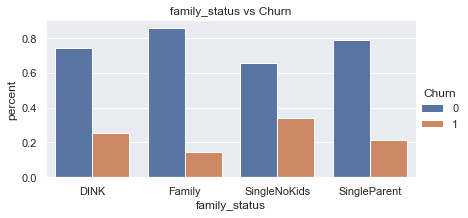

In [889]:
group_churn_rate('family_status','Churn','family_status vs Churn')

In [890]:
SingleNoKids = df[df['family_status']=='SingleNoKids']['Churn']
SingleParent = df[df['family_status']=='SingleParent']['Churn']
DINK = df[df['family_status']=='DINK']['Churn']
Family = df[df['family_status']=='Family']['Churn']

In [891]:
from scipy.stats import f_oneway

In [892]:
f_stat, p_val = f_oneway(SingleNoKids, SingleParent, DINK, Family)

In [893]:
f_stat, p_val

(83.25276784605188, 6.319870210224405e-53)

**Based on hypothesis test, we should include family_status**

In [894]:
#Average price per service
df['avg_price'] = df['MonthlyCharges'] / df['services']

In [895]:
churn = df[df['Churn']==1]
no_churn = df[df['Churn']==0]

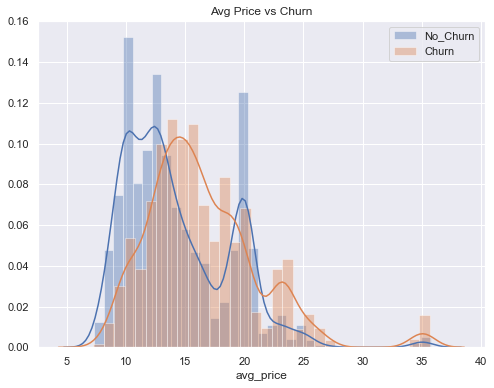

In [921]:
fig, ax = plt.subplots(1,1)
sns.distplot(no_churn['avg_price'],ax=ax, label='No_Churn')
sns.distplot(churn['avg_price'],ax=ax, label='Churn')
ax.set_title('Avg Price vs Churn')
plt.legend()
plt.show()

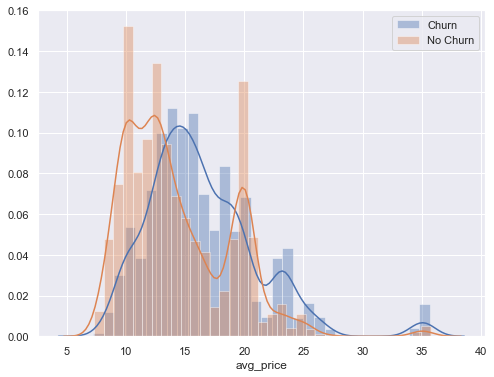

In [896]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(churn['avg_price'],label='Churn') # Blue distribution
sns.distplot(no_churn['avg_price'],label='No Churn') # Green distribution
plt.legend()

In [897]:
#Extra Charges
df['extra_charges'] = df['MonthlyCharges'] * df['tenure'] - df['TotalCharges']

In [898]:
churn = df[df['Churn']==1]
no_churn = df[df['Churn']==0]

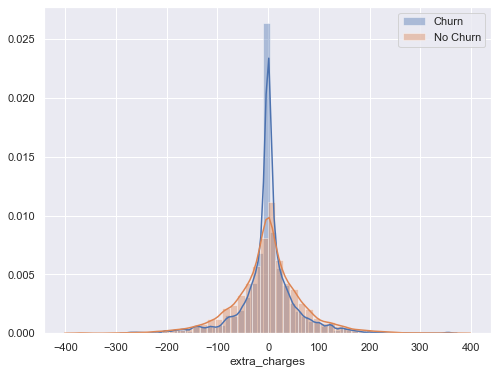

In [899]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(churn['extra_charges'],label='Churn') # Blue distribution
sns.distplot(no_churn['extra_charges'],label='No Churn') # Green distribution
plt.legend()

In [900]:
conditions = [
    (df['Contract']=="Two year") & (df['MultipleLines']=='No')
]

choices = [
    (1)
]

df['Contract2^MultipleLinesNo'] = np.select(conditions, choices, 0)

In [901]:
conditions = [
    (df['TechSupport']=='No') & (df['OnlineSecurity']=='No')
]

choices = [
    (1)
]

df['TechSupportNo^OnlineSecurityNo'] = np.select(conditions, choices, 0)

In [902]:
conditions = [
    (df['Contract']=='Two year') & (df['MultipleLines']=='No phone service')
]

choices = [
    (1)
]

df['Contract2^MultipleLinesNo'] = np.select(conditions, choices, 0)

In [903]:
df.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,has_internet,fiber_optic,services,family_status,avg_price,extra_charges,Contract2^MultipleLinesNo,TechSupportNo^OnlineSecurityNo
0,Female,0,1.0,No,No phone service,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1,0,3,DINK,9.950000,0.00,0,1
1,Male,0,34.0,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,1,0,4,SingleNoKids,14.237500,46.80,0,0
2,Male,0,2.0,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1,0,5,SingleNoKids,10.770000,-0.45,0,0
3,Male,0,45.0,No,No phone service,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,1,0,4,SingleNoKids,10.575000,62.75,0,0
4,Female,0,2.0,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1,1,3,SingleNoKids,23.566667,-10.25,0,1


In [904]:
cats = ['gender','SeniorCitizen','PhoneService',
       'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
       'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
       'PaymentMethod','Contract2^MultipleLinesNo',
        'TechSupportNo^OnlineSecurityNo','family_status','fiber_optic','Contract2^MultipleLinesNo','has_internet']

for cat in cats:
    df[cat] = df[cat].astype('str')

In [905]:
cats = ['gender','SeniorCitizen','PhoneService',
       'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
       'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
       'PaymentMethod']

for cat in cats:
    df_base[cat] = df_base[cat].astype('str')

In [906]:
df_base = pd.get_dummies(df_base,drop_first=True)

In [907]:
df_base.to_csv('df_base.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134f214f0>,
      dtype=object)

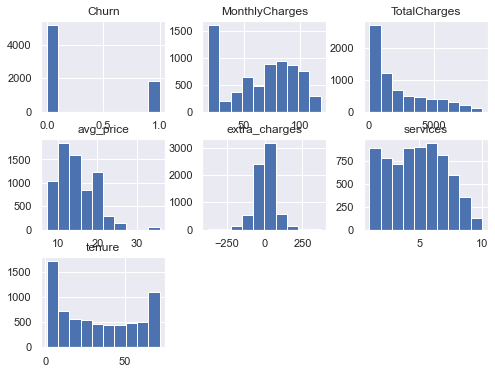

In [908]:
df.hist()

In [909]:
#Logging Continuous Variables
df['TotalCharges'] = np.log(df['TotalCharges'])
df['MonthlyCharges'] = np.log(df['MonthlyCharges'])
df['tenure'] = np.log(df['tenure'])

In [910]:
df = pd.get_dummies(df,drop_first=True)

In [911]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,services,avg_price,extra_charges,gender_Male,SeniorCitizen_1,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,has_internet_1,fiber_optic_1,family_status_Family,family_status_SingleNoKids,family_status_SingleParent,Contract2^MultipleLinesNo_1,TechSupportNo^OnlineSecurityNo_1
0,0.000000,3.396185,3.396185,0,3,9.950000,0.00,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
1,3.526361,4.042174,7.544068,0,4,14.237500,46.80,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0
2,0.693147,3.986202,4.683519,1,5,10.770000,-0.45,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0
3,3.806662,3.744787,7.517928,0,4,10.575000,62.75,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,0.693147,4.258446,5.021575,1,3,23.566667,-10.25,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1


In [912]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [913]:
scaler = StandardScaler()
columns = df.columns
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)

In [914]:
scaler = MinMaxScaler()
columns = df.columns
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)

In [915]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,services,avg_price,extra_charges,gender_Male,SeniorCitizen_1,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,has_internet_1,fiber_optic_1,family_status_Family,family_status_SingleNoKids,family_status_SingleParent,Contract2^MultipleLinesNo_1,TechSupportNo^OnlineSecurityNo_1
0,0.000000,0.262711,0.075353,0.0,0.222222,0.095974,0.501613,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.824558,0.607633,0.751403,0.0,0.333333,0.246062,0.564507,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.162077,0.577747,0.285172,1.0,0.444444,0.124679,0.501008,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.890100,0.448845,0.747142,0.0,0.333333,0.117853,0.585943,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.162077,0.723110,0.340270,1.0,0.222222,0.572637,0.487838,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [916]:
df.to_csv('preprocessed.csv')

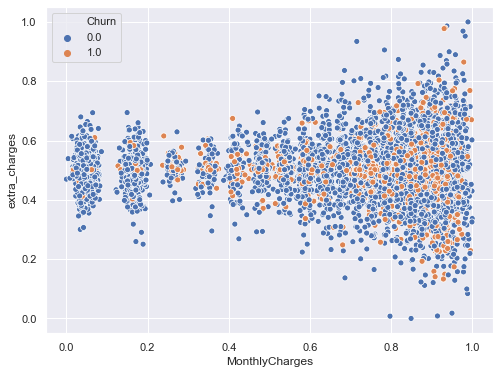

In [917]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8,6)})
sns.scatterplot(x='MonthlyCharges',y='extra_charges',data=df,hue='Churn')
plt.legend()

In [918]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,services,avg_price,extra_charges,gender_Male,SeniorCitizen_1,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,has_internet_1,fiber_optic_1,family_status_Family,family_status_SingleNoKids,family_status_SingleParent,Contract2^MultipleLinesNo_1,TechSupportNo^OnlineSecurityNo_1
0,0.000000,0.262711,0.075353,0.0,0.222222,0.095974,0.501613,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.824558,0.607633,0.751403,0.0,0.333333,0.246062,0.564507,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.162077,0.577747,0.285172,1.0,0.444444,0.124679,0.501008,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.890100,0.448845,0.747142,0.0,0.333333,0.117853,0.585943,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.162077,0.723110,0.340270,1.0,0.222222,0.572637,0.487838,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


Text(0.5, 1.0, 'Feature Heatmap')

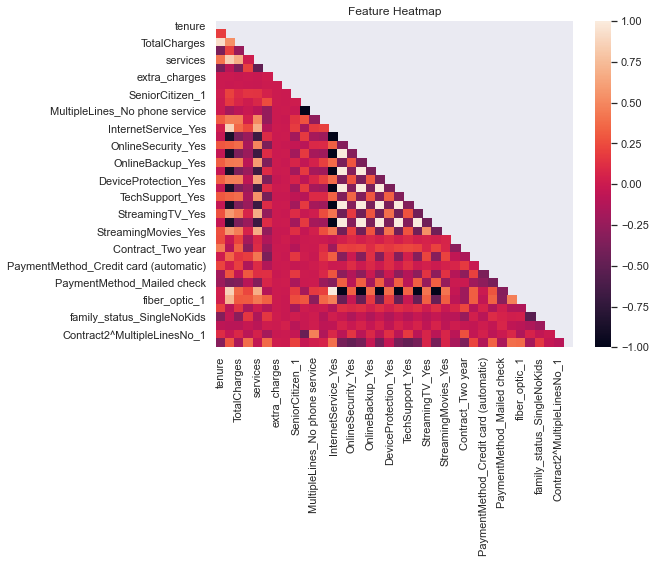

In [919]:
mask_ut=np.triu(np.ones(df.corr().shape)).astype(np.bool)
sns.heatmap(df.corr(),mask=mask_ut)
plt.title('Feature Heatmap')